Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Taxi"

In [1]:
import numpy as np
import random
from taxi_env_extended import TaxiEnvExtended

In [2]:
env = TaxiEnvExtended()

Obtener la cantidad de estados y acciones

In [3]:
actions = env.action_space.n
states = env.observation_space.n

Inicialización de la tabla Q

In [4]:
Q = np.zeros((states, actions))
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Obtención de la acción a partir de la tabla Q

In [5]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

Epsilon-Greedy Policy

In [6]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()\
    
    else: # exploit
        action = np.argmax(Q[state])\
        
    return action

Ejemplo de episodio 

In [7]:
obs,_ = env.reset()
print(obs)
done = False
total_reward = 0
step_count = 0
while not done:
    state = obs
    action = epsilon_greedy_policy(state, Q, 0.5)
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    step_count += 1
    print('->', state, action, reward, obs, done)
    env.render()
print('total_reward', total_reward)
print('total_steps', step_count)

424
-> 424 5 -10 424 False
-> 424 0 -1 424 False
-> 424 0 -1 424 False
-> 424 5 -10 424 False
-> 424 0 -1 424 False
-> 424 4 -10 424 False
-> 424 3 -1 424 False
-> 424 0 -1 424 False
-> 424 0 -1 424 False
-> 424 0 -1 424 False
-> 424 0 -1 424 False
-> 424 1 -1 324 False
-> 324 0 -1 424 False
-> 424 0 -1 424 False
-> 424 1 -1 324 False
-> 324 0 -1 424 False
-> 424 5 -10 424 False
-> 424 4 -10 424 False
-> 424 0 -1 424 False
-> 424 2 -1 444 False
-> 444 0 -1 444 False
-> 444 0 -1 444 False
-> 444 0 -1 444 False
-> 444 0 -1 444 False
-> 444 0 -1 444 False
-> 444 2 -1 444 False
-> 444 0 -1 444 False
-> 444 0 -1 444 False
-> 444 1 -1 344 False
-> 344 3 -1 324 False
-> 324 0 -1 424 False
-> 424 0 -1 424 False
-> 424 3 -1 424 False
-> 424 5 -10 424 False
-> 424 0 -1 424 False
-> 424 0 -1 424 False
-> 424 0 -1 424 False
-> 424 0 -1 424 False
-> 424 5 -10 424 False
-> 424 0 -1 424 False
-> 424 3 -1 424 False
-> 424 0 -1 424 False
-> 424 5 -10 424 False
-> 424 2 -1 444 False
-> 444 0 -1 444 Fals

Generar muchos episodios

In [8]:
max_steps = env.max_steps
max_steps

200

In [9]:
episodes = 50000

In [10]:
alpha=1 / (max_steps+1)
alpha

0.004975124378109453

In [11]:
gamma = 0.9

In [12]:
epsilon =0.99

In [13]:
rewards=[]
steps=[]

In [14]:
from tqdm import tqdm

In [15]:
i = 0
success = 0
for i in tqdm(range(episodes)):
    
    total_reward = 0    
    step_count = 0
    obs, _ = env.reset()
    done=False
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q, 0.1)
        obs, reward, done, _, _ = env.step(action)
        
        total_reward += reward
        step_count += 1
        if (reward ==20):
            success+=1
                      
        value = Q[state][action] + alpha*(reward + gamma*np.max(Q[obs]) - Q[state][action])
        Q[state][action] = value
    
    rewards.append(total_reward)
    steps.append(step_count)
    i=i+1
    if (i % 100 == 0) and (epsilon > 0.1):  # Use logical AND operator "and"
        epsilon *= 0.999
print(success)


100%|██████████| 50000/50000 [00:44<00:00, 1123.89it/s]

46891


In [21]:
print(success/episodes*100, '%')

93.782 %


In [22]:
import matplotlib.pyplot as plt


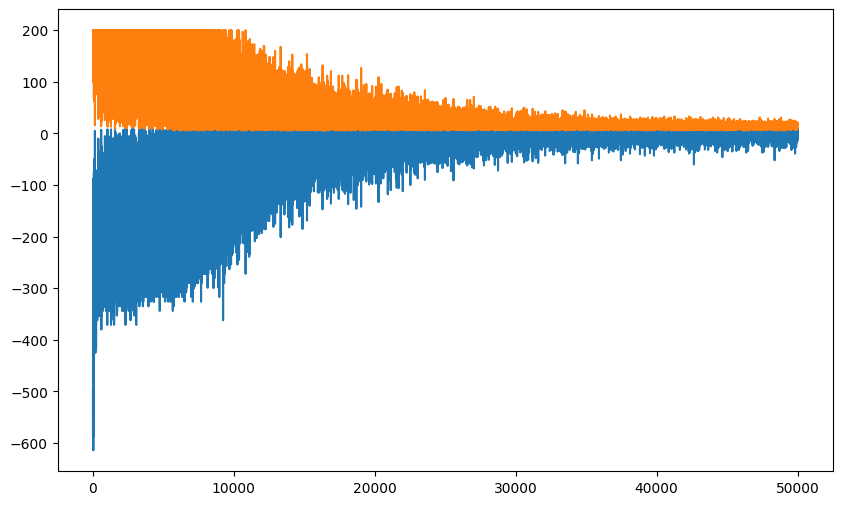

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.plot(steps)

plt.show()

In [19]:
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.65035152, -2.35960496, -3.09721167, -2.33108743,  1.62245616,
        -4.85892535],
       [-0.14470187,  0.13941259, -1.29805307, -0.0132227 ,  7.71468069,
        -2.35072165],
       ...,
       [-0.81615576,  0.57267167, -0.80626798, -0.7760634 , -0.88647616,
        -0.83917928],
       [-2.23734818, -2.23375252, -2.23744828, -1.0743083 , -2.35060802,
        -2.43790689],
       [ 0.01071755,  0.06064684,  0.04393152, 10.17657134, -0.1637371 ,
        -0.0875752 ]])

In [24]:
i = 0
while i< 10:
    print("episode:", i+1)
    obs,_ = env.reset()
    done = False
    total_reward = 0
    step_count = 0
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q)
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        step_count += 1
        env.render()
    i+=1
    print('total_reward', total_reward)
    print('total_steps', step_count)

episode: 1
total_reward 6
total_steps 15
episode: 2
total_reward 10
total_steps 11
episode: 3
total_reward 5
total_steps 16
episode: 4
total_reward -6
total_steps 18
episode: 5
total_reward -2
total_steps 14
